In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [3]:
data = pd.read_csv("data2.csv")
data.head()

,glicemia,pressao_sanguinea,dobra_cutane_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1


In [4]:
x = data.drop("diabetes", axis=1)
y = data["diabetes"]

In [ ]:
# divisao dos dados

x, x_teste, y, y_teste = train_test_split(
    x, y, test_size=0.05, random_state=12, stratify=y
)
x_treino, x_validacao, y_treino, y_validacao = train_test_split(
    x, y, test_size=0.25, random_state=12, stratify=y
)


In [9]:
# aplicando modelo

arvore = DecisionTreeClassifier(random_state=12, max_depth=5)
arvore.fit(x_treino, y_treino)
print(arvore.score(x_teste, y_teste))
print(arvore.score(x_validacao, y_validacao))

0.7166666666666667
0.7254901960784313


[[29  5]
 [ 9  8]]


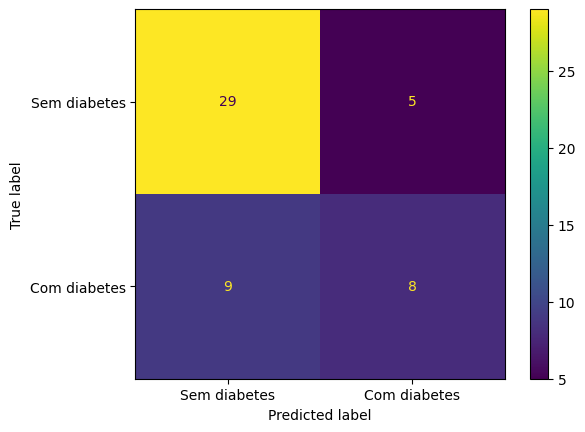

In [12]:
y_prev = arvore.predict(x_validacao)
matriz_confusao = confusion_matrix(y_validacao, y_prev)
print(matriz_confusao)
visualizacao = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=["Sem diabetes", "Com diabetes"])
visualizacao.plot()

0.6833333333333333
0.7254901960784313
[[31  3]
 [11  6]]


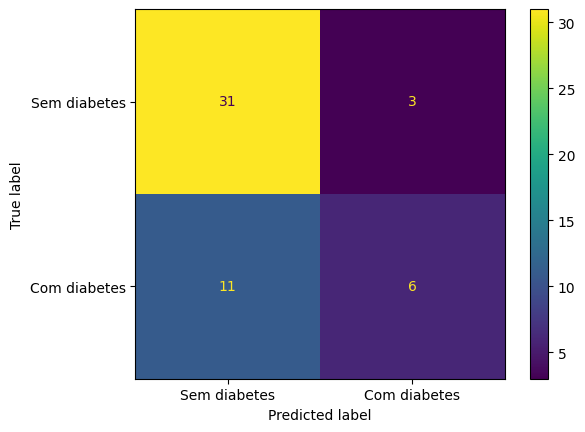

In [13]:
ramdom_forest = RandomForestClassifier(random_state=12, max_depth=5, n_estimators=100)
ramdom_forest.fit(x_treino, y_treino)
print(ramdom_forest.score(x_teste, y_teste))
print(ramdom_forest.score(x_validacao, y_validacao))

y_prev = ramdom_forest.predict(x_validacao)
matriz_confusao = confusion_matrix(y_validacao, y_prev)
print(matriz_confusao)
visualizacao = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=["Sem diabetes", "Com diabetes"])
visualizacao.plot()